In [1]:
%reload_ext autoreload
%autoreload 2

import os, sys
sys.path.append("..")

import numpy as np
import healpy as hp
from astropy.io import fits
from pprint import pprint
from tqdm import tqdm

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc_file('matplotlibrc')

## 1. Data

This notebook needs to be run on erebus.

In [2]:
data_dir = '/zfs/tslatyer/fermimaps/allsky/PASS8_Jun19_UltracleanVeto/specbin'
save_dir = '../data/fermi_data_573w/ebin'

In [3]:
fs = os.listdir(data_dir)
print(len(fs))
data_fs = [f for f in fs if f.startswith('fermi-allsky-')]
print(len(data_fs))
tmpl_fs = [f for f in fs if f.startswith('diffuse')]
print(len(tmpl_fs))

1199
1120
79


In [4]:
estrs = [(float(f.split('-')[2]), float(f.split('-')[3].split('GeV')[0]), f.split('-')[2]+'-'+f.split('-')[3]) for f in data_fs]
estrs = list(set(estrs))
estrs.sort()
es = np.array([estr[:2] for estr in estrs])
print(estrs)
print(len(es))

[(0.2, 0.3, '000.2-000.3GeV'), (0.3, 0.3, '000.3-000.3GeV'), (0.3, 0.4, '000.3-000.4GeV'), (0.4, 0.5, '000.4-000.5GeV'), (0.5, 0.6, '000.5-000.6GeV'), (0.6, 0.8, '000.6-000.8GeV'), (0.8, 1.0, '000.8-001.0GeV'), (1.0, 1.3, '001.0-001.3GeV'), (1.3, 1.6, '001.3-001.6GeV'), (1.6, 2.0, '001.6-002.0GeV'), (2.0, 2.5, '002.0-002.5GeV'), (2.5, 3.2, '002.5-003.2GeV'), (3.2, 4.0, '003.2-004.0GeV'), (4.0, 5.0, '004.0-005.0GeV'), (5.0, 6.3, '005.0-006.3GeV'), (6.3, 8.0, '006.3-008.0GeV'), (8.0, 10.0, '008.0-010.0GeV'), (10.0, 12.6, '010.0-012.6GeV'), (12.6, 15.9, '012.6-015.9GeV'), (15.9, 20.0, '015.9-020.0GeV'), (20.0, 25.2, '020.0-025.2GeV'), (25.2, 31.7, '025.2-031.7GeV'), (31.7, 39.9, '031.7-039.9GeV'), (39.9, 50.2, '039.9-050.2GeV'), (50.2, 63.2, '050.2-063.2GeV'), (63.2, 79.6, '063.2-079.6GeV'), (79.6, 100.2, '079.6-100.2GeV'), (100.2, 126.2, '100.2-126.2GeV'), (126.2, 158.9, '126.2-158.9GeV'), (158.9, 200.0, '158.9-200.0GeV'), (200.0, 251.8, '200.0-251.8GeV'), (251.8, 317.0, '251.8-317.0GeV'

In [5]:
options = ['-'.join(f.split('-')[4:]).split('.fits')[0] for f in data_fs]
options = list(set(options))
options.sort()
pprint(options)
print(len(options))

['fwhm000-0512-bestpsf-mask',
 'fwhm000-0512-bestpsf-mask_4fgl_special',
 'fwhm000-0512-bestpsf-nopsc',
 'fwhm000-0512-bestpsf-pscmdl',
 'fwhm000-0512-bestpsf-pscmdl-4fgl',
 'fwhm000-0512-psfq2-mask',
 'fwhm000-0512-psfq2-nopsc',
 'fwhm000-0512-psfq2-pscmdl',
 'fwhm000-0512-psfq2-pscmdl-4fgl',
 'fwhm000-0512-psfq3-mask',
 'fwhm000-0512-psfq3-nopsc',
 'fwhm000-0512-psfq3-pscmdl',
 'fwhm000-0512-psfq3-pscmdl-4fgl',
 'fwhm120-0512-bestpsf-masked',
 'fwhm120-0512-bestpsf-masked-nopsc',
 'fwhm120-0512-bestpsf-nopsc',
 'fwhm120-0512-bestpsf-pscmdl',
 'fwhm120-0512-bestpsf-pscmdl-4fgl',
 'fwhm120-0512-psfq2-masked',
 'fwhm120-0512-psfq2-masked-nopsc',
 'fwhm120-0512-psfq2-nopsc',
 'fwhm120-0512-psfq2-pscmdl',
 'fwhm120-0512-psfq2-pscmdl-4fgl',
 'fwhm120-0512-psfq3-masked',
 'fwhm120-0512-psfq3-masked-nopsc',
 'fwhm120-0512-psfq3-nopsc',
 'fwhm120-0512-psfq3-pscmdl',
 'fwhm120-0512-psfq3-pscmdl-4fgl']
28


### 1.1 Select a `data_option`

In [6]:
data_option = 'fwhm000-0512-bestpsf-nopsc'
[f for f in data_fs if data_option in f]

['fermi-allsky-000.2-000.3GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-005.0-006.3GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-200.0-251.8GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-015.9-020.0GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-002.5-003.2GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-031.7-039.9GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-126.2-158.9GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-502.4-632.5GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-000.5-000.6GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-020.0-025.2GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-004.0-005.0GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-317.0-399.1GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-000.6-000.8GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-010.0-012.6GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-006.3-008.0GeV-fwhm000-0512-bestpsf-nopsc.fits',
 'fermi-allsky-001.3-001.6GeV-fwhm000-05

In [7]:
h = fits.open(f'{data_dir}/fermi-allsky-000.3-000.4GeV-fwhm000-0512-bestpsf-nopsc.fits')

In [10]:
counts_arr = []
exposure_arr = []

for _, _, estr in tqdm(estrs):
    h = fits.open(f'{data_dir}/fermi-allsky-{estr}-{data_option}.fits')
    counts_raw = h[0].data * h[1].data * (4 * np.pi / len(h[0].data)) # flux * exposure * solid angle
    counts = np.round(counts_raw)
    if np.any(np.abs(counts - counts_raw) > 0.001):
        raise ValueError('Large deviation from integers in counts.')
    counts_arr.append(counts)
    exposure_arr.append(h[1].data)
    
np.save(f'{save_dir}/counts-{data_option}.npy', np.array(counts_arr))
np.save(f'{save_dir}/exposure-{data_option}.npy', np.array(exposure_arr))

100%|██████████| 40/40 [00:10<00:00,  3.74it/s]


### 1.1 psc

In [11]:
option = 'fwhm120-0512-bestpsf-pscmdl.fits'
option_save = 'bestpsf-3fgl'
print(len([f for f in data_fs if option in f]))

40


In [12]:
option = 'fwhm120-0512-bestpsf-pscmdl-4fgl.fits'
option_save = 'bestpsf-4fgl'
print(len([f for f in data_fs if option in f]))

40


In [13]:
data = []

for _, _, estr in tqdm(estrs):
    h = fits.open(f'{data_dir}/fermi-allsky-{estr}-{option}')
    data.append(h[0].data)
    
np.save(f'{save_dir}/psc-{option_save}.npy', np.array(data))

100%|██████████| 40/40 [00:00<00:00, 960.11it/s]


## 2. Mask and point sources

In [8]:
import utils.create_mask as cm
from utils.cart import to_cart

In [9]:
# masks (models.np_model.NPModel)
n_pixels = 80
pixelsize = 0.5

nside = 256

mask_ps = np.load('../data/fermi_data_573w/fermi_data_256/fermidata_pscmask_3fgl.npy') == 1

mask_roi    = cm.make_mask_total(nside=nside, band_mask=True, band_mask_range=2., mask_ring=True,  inner=0, outer=20., custom_mask=mask_ps)
mask_square = cm.make_mask_total(nside=nside, band_mask=True, band_mask_range=2., mask_ring=False, inner=0, outer=20., custom_mask=mask_ps)
mask_plane  = cm.make_mask_total(nside=nside, band_mask=True, band_mask_range=2., mask_ring=True,  inner=0, outer=20.,)

mask_roi_cart    = to_cart(mask_roi,    n_pixels=n_pixels, pixelsize=pixelsize) > 0
mask_square_cart = to_cart(mask_square, n_pixels=n_pixels, pixelsize=pixelsize) > 0
mask_plane_cart  = to_cart(mask_plane,  n_pixels=n_pixels, pixelsize=pixelsize) > 0

In [19]:
# comparison
h = fits.open(f'{data_dir}/fermi-allsky-000.2-000.3GeV-fwhm000-0512-bestpsf-mask.fits')
mask_ps_ = (hp.pixelfunc.ud_grade(h[0].data, nside) == 1)

mask_roi_    = cm.make_mask_total(nside=nside, band_mask=True, band_mask_range=2., mask_ring=True,  inner=0, outer=20., custom_mask=mask_ps_)
mask_square_ = cm.make_mask_total(nside=nside, band_mask=True, band_mask_range=2., mask_ring=False, inner=0, outer=20., custom_mask=mask_ps_)
mask_plane_  = cm.make_mask_total(nside=nside, band_mask=True, band_mask_range=2., mask_ring=True,  inner=0, outer=20.,)

mask_roi_cart_    = to_cart(mask_roi_,    n_pixels=n_pixels, pixelsize=pixelsize) > 0
mask_square_cart_ = to_cart(mask_square_, n_pixels=n_pixels, pixelsize=pixelsize) > 0
mask_plane_cart_  = to_cart(mask_plane_,  n_pixels=n_pixels, pixelsize=pixelsize) > 0

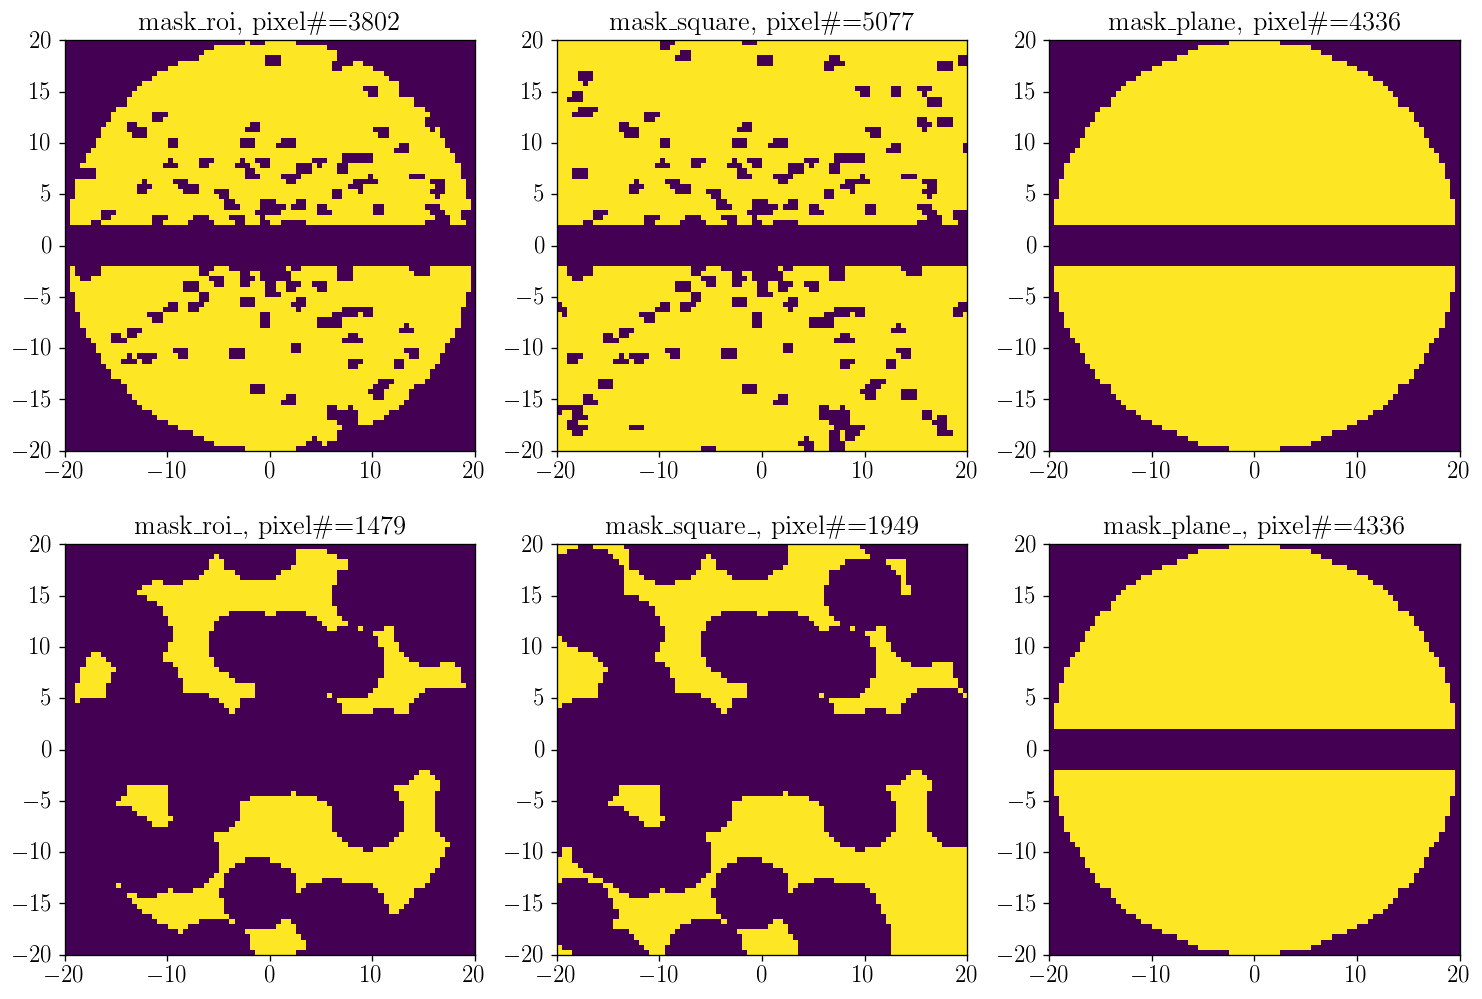

In [20]:
fig, axs = plt.subplots(2, 3, figsize=(15,10))
for i, (name, m) in enumerate(zip(['mask_roi', 'mask_square', 'mask_plane'], [mask_roi_cart, mask_square_cart, mask_plane_cart])):
    axs[0,i].imshow(~m, extent=(-20,20,-20,20))
    axs[0,i].set(title=f'{name}, pixel\#={np.sum(~m)}')
    #axs[i].set(xlabel='l [deg]', ylabel='b [deg]')
for i, (name, m) in enumerate(zip(['mask_roi_', 'mask_square_', 'mask_plane_'], [mask_roi_cart_, mask_square_cart_, mask_plane_cart_])):
    axs[1,i].imshow(~m, extent=(-20,20,-20,20))
    axs[1,i].set(title=f'{name}, pixel\#={np.sum(~m)}')
    #axs[i].set(xlabel='l [deg]', ylabel='b [deg]')

In [32]:
options = ['-'.join(f.split('-')[4:]).split('.fits')[0] for f in data_fs]
options = list(set(options))
options.sort()
pprint(options)
print(len(options))

['fwhm000-0512-bestpsf-mask',
 'fwhm000-0512-bestpsf-mask_4fgl_special',
 'fwhm000-0512-bestpsf-nopsc',
 'fwhm000-0512-bestpsf-pscmdl',
 'fwhm000-0512-bestpsf-pscmdl-4fgl',
 'fwhm000-0512-psfq2-mask',
 'fwhm000-0512-psfq2-nopsc',
 'fwhm000-0512-psfq2-pscmdl',
 'fwhm000-0512-psfq2-pscmdl-4fgl',
 'fwhm000-0512-psfq3-mask',
 'fwhm000-0512-psfq3-nopsc',
 'fwhm000-0512-psfq3-pscmdl',
 'fwhm000-0512-psfq3-pscmdl-4fgl',
 'fwhm120-0512-bestpsf-masked',
 'fwhm120-0512-bestpsf-masked-nopsc',
 'fwhm120-0512-bestpsf-nopsc',
 'fwhm120-0512-bestpsf-pscmdl',
 'fwhm120-0512-bestpsf-pscmdl-4fgl',
 'fwhm120-0512-psfq2-masked',
 'fwhm120-0512-psfq2-masked-nopsc',
 'fwhm120-0512-psfq2-nopsc',
 'fwhm120-0512-psfq2-pscmdl',
 'fwhm120-0512-psfq2-pscmdl-4fgl',
 'fwhm120-0512-psfq3-masked',
 'fwhm120-0512-psfq3-masked-nopsc',
 'fwhm120-0512-psfq3-nopsc',
 'fwhm120-0512-psfq3-pscmdl',
 'fwhm120-0512-psfq3-pscmdl-4fgl']
28


In [56]:
data_option = 'fwhm000-0512-bestpsf-mask_4fgl_special.fits'
print(len([f for f in data_fs if data_option in f]))

40


In [57]:
data = []

for _, _, estr in tqdm(estrs):
    h = fits.open(f'{data_dir}/fermi-allsky-{estr}-{data_option}')
    data.append(h[0].data)
    
np.save(f'{save_dir}/mask-{data_option.split(".fits")[0]}.npy', np.array(data))

100%|██████████████████████████████████████████████████████████████████████████████████| 40/40 [00:00<00:00, 366.61it/s]


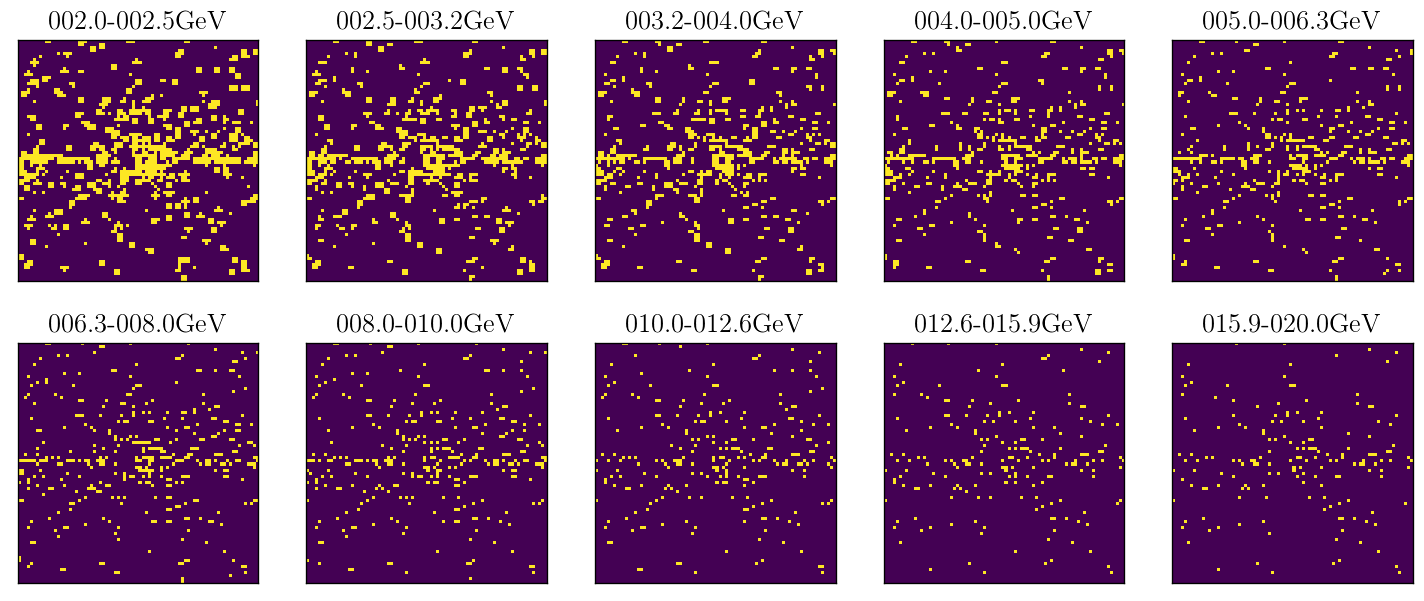

In [63]:
fig, axs = plt.subplots(2, 5, figsize=(15, 6))
for ie in range(10, 20):
    i = (ie - 10) // 5
    j = (ie - 10) %  5
    axs[i,j].imshow(to_cart(data[ie], n_pixels=n_pixels, pixelsize=pixelsize) > 0)
    axs[i,j].set(xticks=[], yticks=[], title=estrs[ie][2])

## 3. CCW and p6v11

In [43]:
tmpl_options = [f.split('_PASS8_Jun19_')[1].split('.fits')[0] for f in tmpl_fs]
tmpl_options = list(set(tmpl_options))
pprint(tmpl_options)

['UltracleanVeto_bestpsf', 'UltracleanVeto_psfq3', 'UltracleanVeto_psfq2']


In [44]:
tmpl_names = [f.split('diffuse_model_map_healpix_')[1].split('_PASS8_Jun19_')[0] for f in tmpl_fs]
tmpl_names = list(set(tmpl_names))
tmpl_names.sort()
pprint(tmpl_names)

['ccwaics',
 'ccwapibrem',
 'ccwfics',
 'ccwfpibrem',
 'ccwgics',
 'ccwgpibrem',
 'ccwhics',
 'ccwhpibrem',
 'ccwiics',
 'ccwipibrem',
 'ccwjics',
 'ccwjpibrem',
 'ccwkics',
 'ccwkpibrem',
 'ccwlics',
 'ccwlpibrem',
 'ccwmics',
 'ccwmpibrem',
 'ccwnics',
 'ccwnpibrem',
 'ccwoics',
 'ccwopibrem',
 'ccwpics',
 'ccwppibrem',
 'ccwqics',
 'ccwqpibrem',
 'ccwrics',
 'ccwrpibrem',
 'p6v11']


In [55]:
option = 'UltracleanVeto_bestpsf.fits'
option_save = 'ultracleanveto-bestpsf'

for name in ['ccwapibrem', 'ccwaics', 'ccwfpibrem', 'ccwfics', 'p6v11']:
    print(name)
    h = fits.open(f'{data_dir}/diffuse_model_map_healpix_{name}_PASS8_Jun19_{option}')
    np.save(f'{save_dir}/{name}-{option_save}.npy', np.array(h[0].data.T))

ccwapibrem
ccwaics
ccwfpibrem
ccwfics
p6v11


## 4. bub

# Appendix

In [3]:
data_dir = '/n/holyscratch01/iaifi_lab/yitians/fermi/fermi-prob-prog/data/fermi_data_573w/ebin'

In [10]:
x = np.load(f'{data_dir}/mOics-ultracleanveto-bestpsf.npy')

In [11]:
x_new = np.zeros((40, 196608))
x_new[10:20] = x

In [12]:
np.save(f'{data_dir}/mOics-ultracleanveto-bestpsf.npy', x_new)

In [5]:
x.shape

(10, 196608)

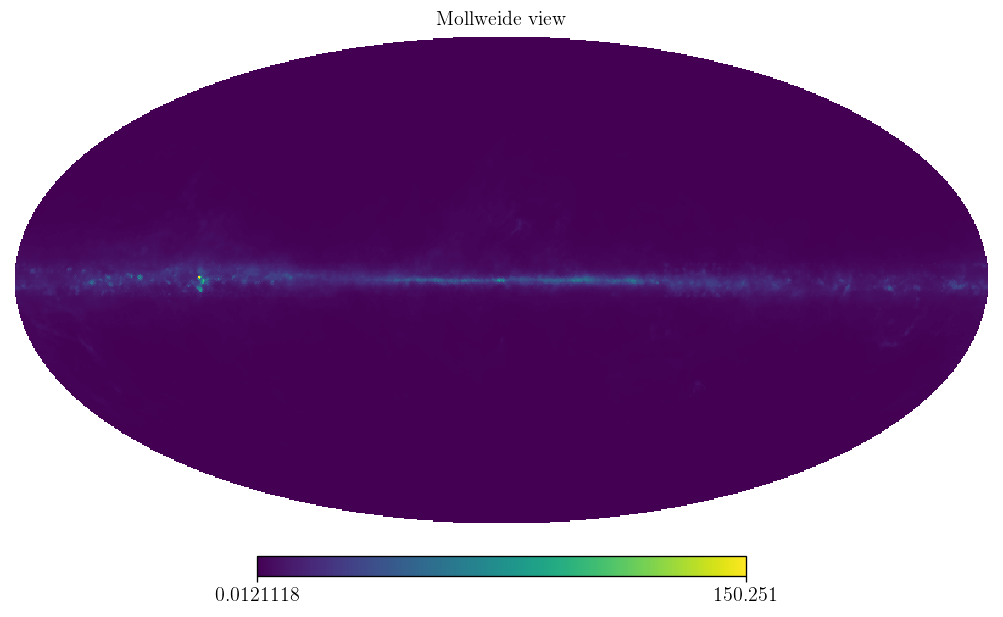

In [7]:
hp.mollview(x[0])

## A. Check data/ and cross_check/data/ templates are the same

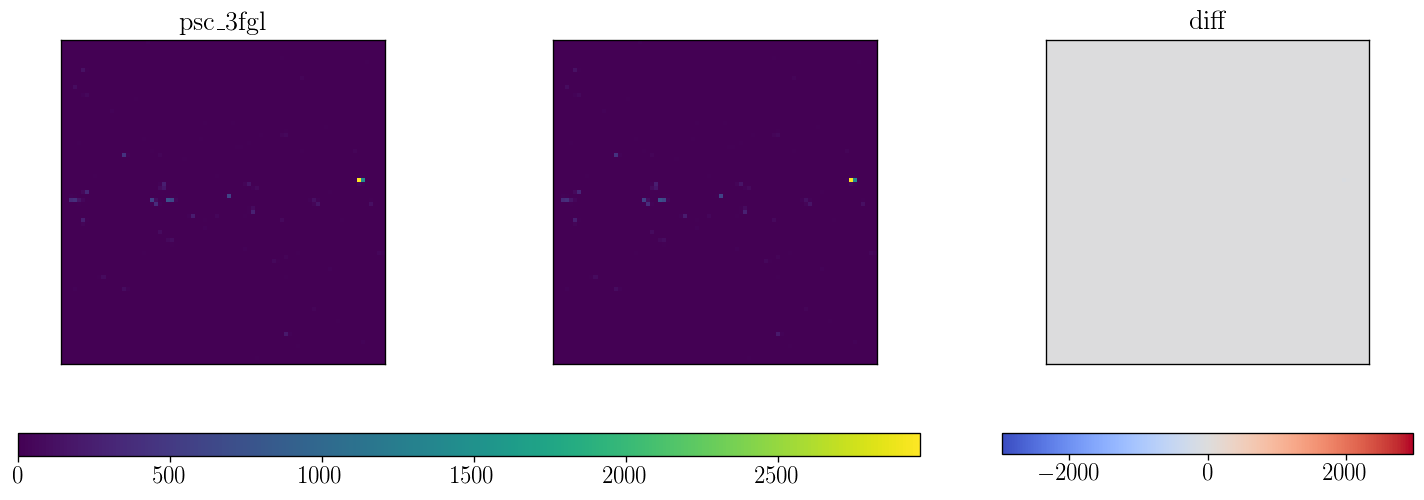

In [54]:
tmpl_path = '../data/fermi_data_573w/fermi_data_256'
cc_tmpl_path = '../cross_check/data/templates_Jun19/' # cross check
comp_nside = 256
tnames0 = ['bub', 'dsk_z1p0', 'dif',   'iso', 'nfw_g1p0', 'psc_3fgl']
tnames1 = ['bub', 'dsk',      'p6v11', 'iso', 'gce',      'psc'     ]

itn = 5 # change this to select

t0 = np.load(f'{tmpl_path}/template_{tnames0[itn]}.npy')
t1 = np.load(f'{cc_tmpl_path}/{tnames1[itn]}_NSIDE512.npy')
t1 = hp.pixelfunc.ud_grade(t1, comp_nside)
t0c = to_cart(t0, n_pixels=n_pixels, pixelsize=pixelsize)
t1c = to_cart(t1, n_pixels=n_pixels, pixelsize=pixelsize)

fig, axs = plt.subplots(1, 3, figsize=(15,5))
im0 = axs[0].imshow(t0c)
im1 = axs[1].imshow(t1c)
vmax = np.max([np.max(np.abs(t0c)), np.max(np.abs(t1c))])
imd = axs[2].imshow(t1c-t0c, cmap='coolwarm', vmin=-vmax, vmax=vmax)
axs[0].set(title=tnames0[itn])
axs[2].set(title='diff')
for j in range(3):
    axs[j].set(xticks=[], yticks=[])
fig.colorbar(im0, ax=axs[:2], orientation='horizontal', aspect=40)
fig.colorbar(imd, ax=axs[2],  orientation='horizontal');